In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [42]:

def System(r,t,w0,w):

    dxdt=r[3]
    dydt=r[4]
    dzdt=r[5]

    dvxdt=-w0*dydt*np.sin(w*t)
    dvydt=w0*dxdt*np.sin(w*t)
    dvzdt=0.

    return[dxdt,dydt,dzdt,dvxdt,dvydt,dvzdt]




Se usó el mismo sistema del preparcial, al no haber una preferencia en el punto de algún sistema. Sin embargo, el código funciona para cualquier sistema de preferencia.


In [43]:
##Runge Kutta 3
def Integrator1(f,r0,t,w0,w):

    h = t[1] - t[0]

    x = np.zeros_like(t)
    y = np.zeros_like(t)
    z = np.zeros_like(t)
    vx = np.zeros_like(t)
    vy = np.zeros_like(t)
    vz=np.zeros_like(t)

    x[0] = r0[0]
    y[0] = r0[1]
    z[0] = r0[2]
    vx[0] = r0[3]
    vy[0] = r0[4]
    vz[0] = r0[5]

    K1 = np.zeros(6)
    K2 = np.zeros(6)

    # Las pendientes instantaneas
    R = np.zeros(6)

    for i in range(1,len(t)):

            R = np.array([x[i-1],y[i-1],z[i-1],vx[i-1],vy[i-1],vz[i-1]])

            K1 = f(R,t[i-1],w0,w)

            R = np.array([x[i-1]+0.5*h*K1[0],y[i-1]+0.5*h*K1[1],z[i-1]+0.5*h*K1[2],vx[i-1]+0.5*h*K1[3],vy[i-1]+0.5*h*K1[4],vz[i-1]+0.5*h*K1[5]])

            K2 = f(R,t[i-1]+0.5*h,w0,w)

            R=np.array([x[i-1]-h*K1[0]+h*K2[0],y[i-1]-h*K1[1]+h*K2[1],z[i-1]-h*K1[2]+h*K2[2],vx[i-1]-h*K1[3]+h*K2[3],vy[i-1]-h*K1[4]+h*K2[4],vz[i-1]-h*K1[5]+h*K2[5]])

            K3=f(R,t[i-1]+h,w0,w)


            x[i] = x[i-1] + (1/6)*h*(K1[0]+4*K2[0]+K3[0])
            y[i] = y[i-1] + (1/6)*h*(K1[1]+4*K2[1]+K3[1])
            z[i] = z[i-1] + (1/6)*h*(K1[2]+4*K2[2]+K3[2])

            vx[i] = vx[i-1] + (1/6)*h*(K1[3]+4*K2[3]+K3[3])
            vy[i] = vy[i-1] + (1/6)*h*(K1[4]+4*K2[4]+K3[4])
            vz[i] = vz[i-1] + (1/6)*h*(K1[5]+4*K2[5]+K3[5])

    return x,y,z,vx,vy,vz

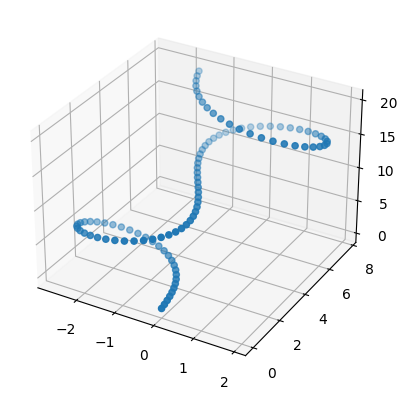

In [44]:
r0=[0,0,0,0,1,1]

t=np.linspace(0,20,100)
x,y,z,vx,vy,vz = Integrator1(System,r0,t,1,0.3)
fig =plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.scatter(x,y,z)

In [45]:
##Runge Kutta 4

def Integrator2(f,r0,t,w0,w):

    h = t[1] - t[0]

    x = np.zeros_like(t)
    y = np.zeros_like(t)
    z = np.zeros_like(t)
    vx = np.zeros_like(t)
    vy = np.zeros_like(t)
    vz=np.zeros_like(t)

    x[0] = r0[0]
    y[0] = r0[1]
    z[0] = r0[2]
    vx[0] = r0[3]
    vy[0] = r0[4]
    vz[0] = r0[5]

    K1 = np.zeros(6)
    K2 = np.zeros(6)

    # Las pendientes instantaneas
    R = np.zeros(6)

    for i in range(1,len(t)):

            R = np.array([x[i-1],y[i-1],z[i-1],vx[i-1],vy[i-1],vz[i-1]])

            K1 = f(R,t[i-1],w0,w)

            R = np.array([x[i-1]+0.5*h*K1[0],y[i-1]+0.5*h*K1[1],z[i-1]+0.5*h*K1[2],vx[i-1]+0.5*h*K1[3],vy[i-1]+0.5*h*K1[4],vz[i-1]+0.5*h*K1[5]])

            K2 = f(R,t[i-1]+0.5*h,w0,w)

            R=np.array([x[i-1]+0.5*h*K2[0],y[i-1]+0.5*h*K2[1],z[i-1]+0.5*h*K2[2],vx[i-1]+0.5*h*K2[3],vy[i-1]+0.5*h*K2[4],vz[i-1]+0.5*h*K2[5]])

            K3=f(R,t[i-1]+0.5*h,w0,w)

            R=np.array([x[i-1]+h*K3[0],y[i-1]+h*K3[1],z[i-1]+h*K3[2],vx[i-1]+h*K3[3],vy[i-1]+h*K3[4],vz[i-1]+h*K3[5]])

            K4=f(R,t[i-1]+h,w0,w)

            x[i] = x[i-1] + (1/6)*h*(K1[0]+2*K2[0]+2*K3[0]+K4[0])
            y[i] = y[i-1] + (1/6)*h*(K1[1]+2*K2[1]+2*K3[1]+K4[1])
            z[i] = z[i-1] + (1/6)*h*(K1[2]+2*K2[2]+2*K3[2]+K4[2])

            vx[i] = vx[i-1] + (1/6)*h*(K1[3]+2*K2[3]+2*K3[3]+K4[3])
            vy[i] = vy[i-1] + (1/6)*h*(K1[4]+2*K2[4]+2*K3[4]+K4[4])
            vz[i] = vz[i-1] + (1/6)*h*(K1[5]+2*K2[5]+2*K3[5]+K4[5])

    return x,y,z,vx,vy,vz


In [46]:
r0=[0,0,0,0,1,1]

t=np.linspace(0,20,100)

x,y,z,vx,vy,vz = Integrator2(System,r0,t,1,0.3)

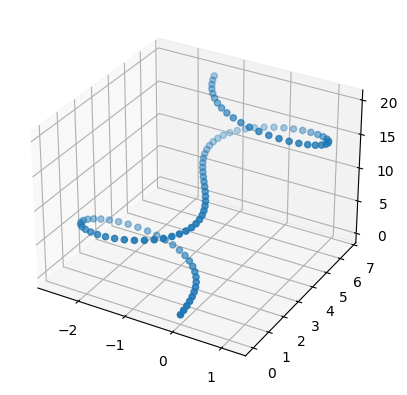

In [47]:
fig =plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.scatter(x,y,z)

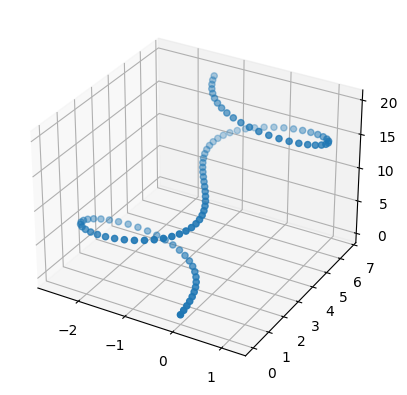

In [48]:
r = integrate.odeint(System,r0,t,args=(1,0.3))

fig =plt.figure()
ax2 = fig.add_subplot(111,projection='3d')

ax2.scatter(r[:,0],r[:,1],r[:,2])


Podemos usar que aunque Runge kutta 3 hace una aproximación bastante parecida a la integral encontrada con el odeint, runge kutta 4 deja una aproximación practicamente perfecta, en donde las diferencias entre ese y la integral verdadera son prácticamente nulas.
